In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
elementary_1=pd.read_csv('test_1_elementary.csv')
elementary_1=elementary_1[elementary_1.time_finished > 0]
elementary_1=elementary_1.assign(type='elementory')
elementary_1['time_on_task(sec)'] = (elementary_1['time_finished']-elementary_1['time_given'])/1000

basic_1=pd.read_csv('test_1_basic.csv')
basic_1=basic_1[basic_1.time_finished > 0]
basic_1=basic_1.assign(type='basic')
basic_1['time_on_task(sec)'] = (basic_1['time_finished']-basic_1['time_given'])/1000
basic_1, elementary_1 = basic_1.assign(scenario='1'), elementary_1.assign(scenario='1')

elementary_2=pd.read_csv('test_2_elementary.csv')
elementary_2=elementary_2[elementary_2.time_finished > 0]
elementary_2=elementary_2.assign(type='elementory')
elementary_2['time_on_task(sec)'] = (elementary_2['time_finished']-elementary_2['time_given'])/1000

basic_2=pd.read_csv('test_2_basic.csv')
basic_2=basic_2[basic_2.time_finished > 0]
basic_2=basic_2.assign(type='basic')
basic_2['time_on_task(sec)'] = (basic_2['time_finished']-basic_2['time_given'])/1000
basic_2, elementary_2 = basic_2.assign(scenario='2'), elementary_2.assign(scenario='2')

elementary_3=pd.read_csv('test_3_elementary.csv')
elementary_3=elementary_3[elementary_3.time_finished > 0]
elementary_3=elementary_3.assign(type='elementory')
elementary_3['time_on_task(sec)'] = (elementary_3['time_finished']-elementary_3['time_given'])/1000

basic_3=pd.read_csv('test_3_basic.csv')
basic_3=basic_3[basic_3.time_finished > 0]
basic_3=basic_3.assign(type='basic')
basic_3['time_on_task(sec)'] = (basic_3['time_finished']-basic_3['time_given'])/1000
basic_3, elementary_3 = basic_3.assign(scenario='3'), elementary_3.assign(scenario='3')

elementary_4=pd.read_csv('test_4_elementary.csv')
elementary_4=elementary_4[elementary_4.time_finished > 0]
elementary_4=elementary_4.assign(type='elementory')
elementary_4['time_on_task(sec)'] = (elementary_4['time_finished']-elementary_4['time_given'])/1000

basic_4=pd.read_csv('test_4_basic.csv')
basic_4=basic_4[basic_4.time_finished > 0]
basic_4=basic_4.assign(type='basic')
basic_4['time_on_task(sec)'] = (basic_4['time_finished']-basic_4['time_given'])/1000
basic_4, elementary_4 = basic_4.assign(scenario='4'), elementary_4.assign(scenario='4')

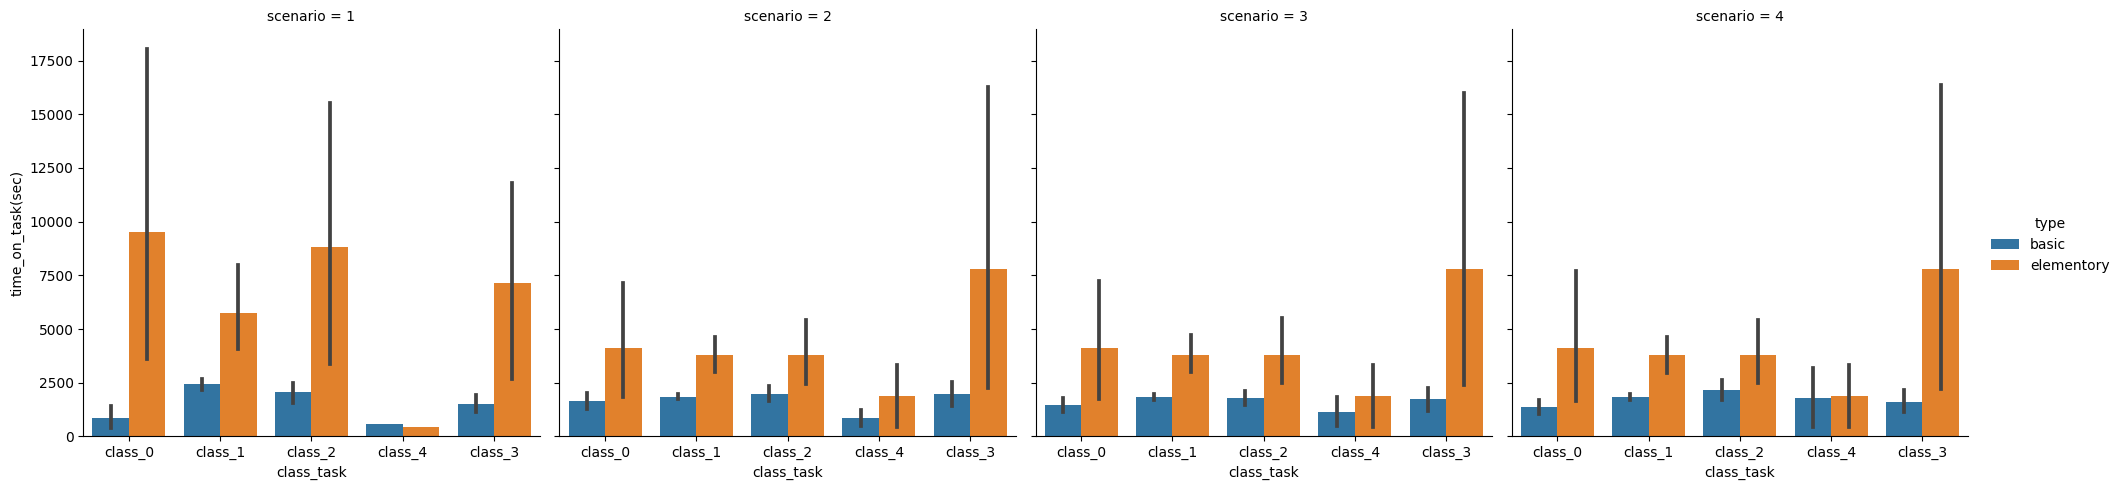

In [14]:
def calc_size(scenario):
    tasks=[0,600,46000,135000,387000,1200000]
    for i in range(len(tasks)-1):
        if (scenario['calc_size'] > tasks[i]) and (scenario['calc_size']<=tasks[i+1]) :
            return f'class_{i}'
        
res_1=pd.concat([basic_1,elementary_1,basic_2,elementary_2,basic_3,elementary_3,basic_4,elementary_4])
res_1['class_task']=res_1.apply(calc_size, axis=1)

sns.catplot(x='class_task',
           y='time_on_task(sec)',
            kind='bar',
            hue='type',
            col='scenario',
            data=res_1)

class_0: calc_size in the interval (0,600]

class_1: calc_size in the interval (600,46_000] 

class_2: calc_size in the interval (46_000,135_000]

class_3: calc_size in the interval (135_000,387_000] 

class_4: calc_size in the interval (387_000,1_200_000]

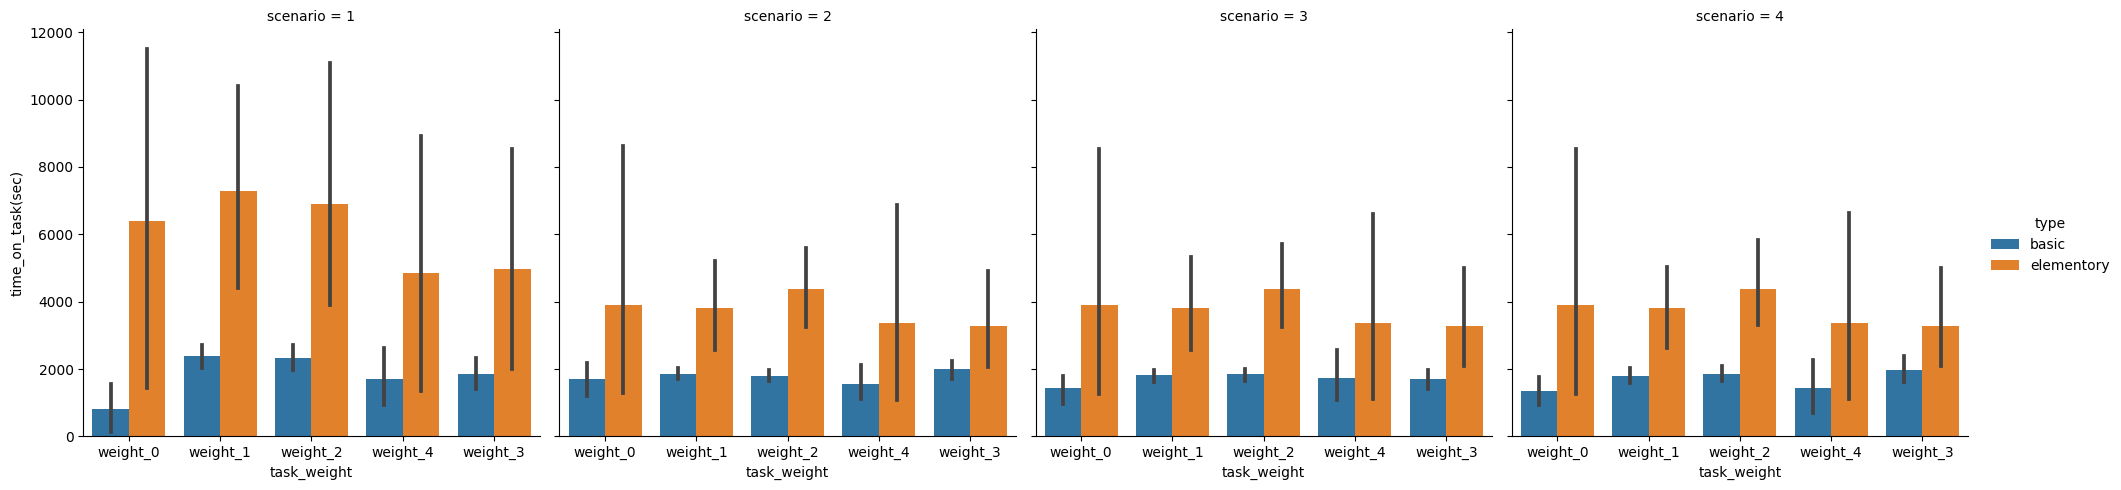

In [15]:
def transfer_weight(scenario):
    tasks=[0,10,30,60,100,200]
    for i in range(len(tasks)-1):
        if (scenario['transfer_weight'] > tasks[i]) and (scenario['transfer_weight']<=tasks[i+1]) :
            return f'weight_{i}'

res_1['task_weight']=res_1.apply(transfer_weight, axis=1)
sns.catplot(x='task_weight',
           y='time_on_task(sec)',
            kind='bar',
            hue='type',
            col='scenario',
            data=res_1)

weight_0: transfer_weight in the interval (0,10]

weight_1: transfer_weight in the interval (10,30]

weight_2: transfer_weight in the interval (30,60]

weight_3: transfer_weight in the interval (60,100]

weight_4: transfer_weight in the interval (100,200]

In [17]:
def class_power_1(tasks):
    classes={1:1,2:7,3:8,4:6}
    for i in classes:
        if tasks['customer_id'] == i:
            return classes[i]

def class_power_2_3_4(tasks):
    classes={1:1,2:2,3:3,4:3,5:4,6:4,7:5,8:5,9:6,10:6,11:7,12:8,13:8}
    for i in classes:
        if tasks['customer_id'] == i:
            return classes[i]

basic_1['class_power']=basic_1.apply(class_power_1,axis=1)
elementary_1['class_power']=elementary_1.apply(class_power_1,axis=1)

basic_2['class_power']=basic_2.apply(class_power_2_3_4,axis=1)
elementary_2['class_power']=elementary_2.apply(class_power_2_3_4,axis=1)

basic_3['class_power']=basic_3.apply(class_power_2_3_4,axis=1)
elementary_3['class_power']=elementary_3.apply(class_power_2_3_4,axis=1)

basic_4['class_power']=basic_4.apply(class_power_2_3_4,axis=1)
elementary_4['class_power']=elementary_4.apply(class_power_2_3_4,axis=1)

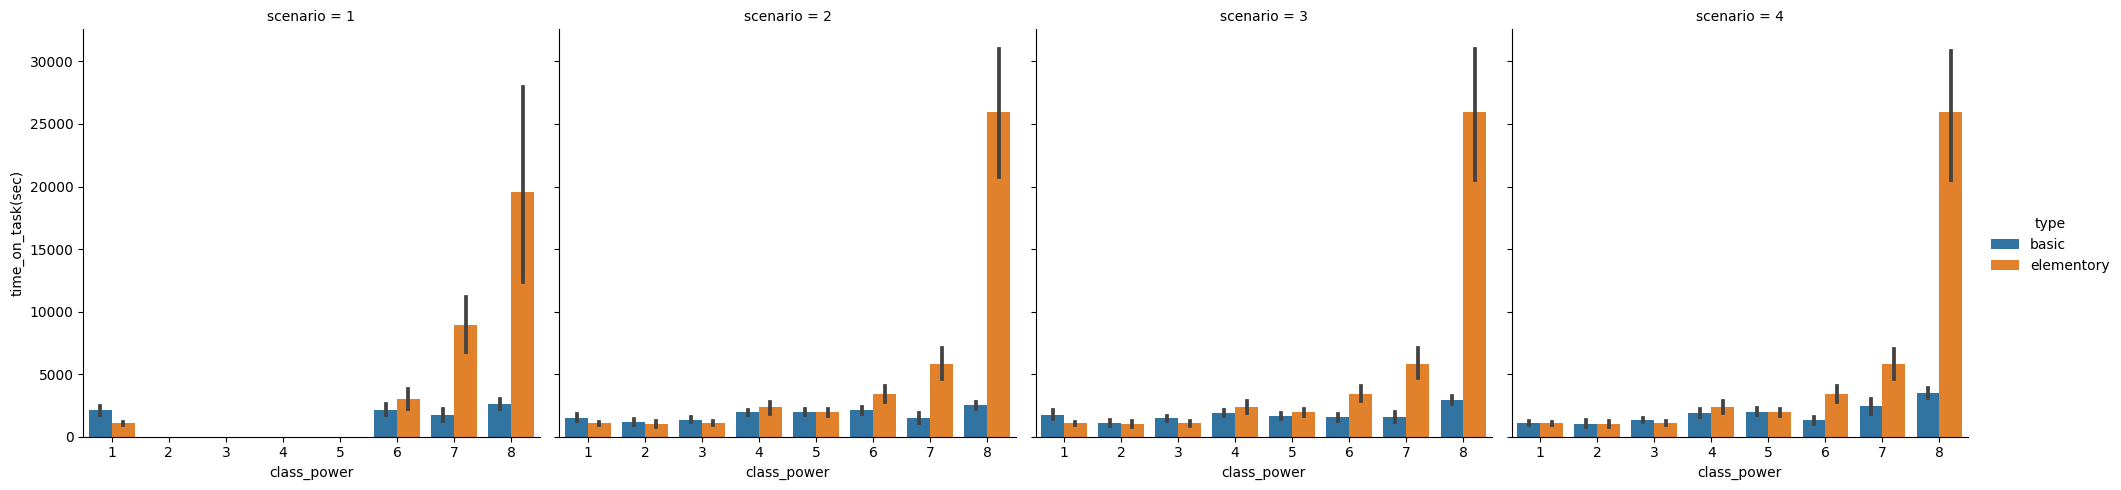

In [18]:
res_2=pd.concat([basic_1,elementary_1,basic_2,elementary_2,basic_3,elementary_3,basic_4,elementary_4])
sns.catplot(x='class_power',
           y='time_on_task(sec)',
            kind='bar',
            hue='type',
            col='scenario',
            data=res_2)

1: ноутбук мощный

2: ноутбук средний

3: смартфон мощный

4: планшет средний

5: смартфон средний

6: смартфон бюджетный

7: смарт-телевизор

8: смарт-часы

In [27]:
print("Time of simulation = 43_200_000 ms")
print()

print(f"Сount of completed tasks in 1 scenario (basic scheduler) = {len(basic_1['id'])}")
print(f"Сount of completed tasks in 1 scenario (elementary scheduler) ={len(elementary_1['id'])}")
print()

print(f"Сount of completed tasks in 2 scenario (basic scheduler) = {len(basic_2['id'])}")
print(f"Сount of completed tasks in 2 scenario (elementary scheduler) = {len(elementary_2['id'])}")
print()

print(f"Сount of completed tasks in 3 scenario (basic scheduler) = {len(basic_3['id'])}")
print(f"Сount of completed tasks in 3 scenario (elementary scheduler) = {len(elementary_3['id'])}")
print()

print(f"Сount of completed tasks in 4 scenario (basic scheduler) = {len(basic_4['id'])}")
print(f"Сount of completed tasks in 4 scenario (elementary scheduler) = {len(elementary_4['id'])}")

Time of simulation = 43_200_000 ms

Сount of completed tasks in 1 scenario (basic scheduler) = 121
Сount of completed tasks in 1 scenario (elementary scheduler) =107

Сount of completed tasks in 2 scenario (basic scheduler) = 375
Сount of completed tasks in 2 scenario (elementary scheduler) = 349

Сount of completed tasks in 3 scenario (basic scheduler) = 361
Сount of completed tasks in 3 scenario (elementary scheduler) = 349

Сount of completed tasks in 4 scenario (basic scheduler) = 349
Сount of completed tasks in 4 scenario (elementary scheduler) = 349


In [35]:
effect_1=(basic_1['calc_size'].sum()/basic_1['time_on_task(sec)'].sum())/(elementary_1['calc_size'].sum()/elementary_1['time_on_task(sec)'].sum())
print(f"Effectiveness basic/elementary (scenario 1) = {effect_1}")

effect_2=(basic_2['calc_size'].sum()/basic_2['time_on_task(sec)'].sum())/(elementary_2['calc_size'].sum()/elementary_2['time_on_task(sec)'].sum())
print(f"Effectiveness basic/elementary (scenario 2) = {effect_2}")

effect_3=(basic_3['calc_size'].sum()/basic_3['time_on_task(sec)'].sum())/(elementary_3['calc_size'].sum()/elementary_3['time_on_task(sec)'].sum())
print(f"Effectiveness basic/elementary (scenario 3) = {effect_3}")

effect_4=(basic_4['calc_size'].sum()/basic_4['time_on_task(sec)'].sum())/(elementary_4['calc_size'].sum()/elementary_4['time_on_task(sec)'].sum())
print(f"Effectiveness basic/elementary (scenario 4) = {effect_4}")

Effectiveness basic/elementary (scenario 1) = 2.852807648258264
Effectiveness basic/elementary (scenario 2) = 2.054008787909672
Effectiveness basic/elementary (scenario 3) = 2.0456171025154295
Effectiveness basic/elementary (scenario 4) = 1.9265891826294204
